# Exercise

### Haberman's Survival

#### Survival of patients who had undergone surgery for breast cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
patients = pd.read_csv('haberman.csv')

patients.shape

(306, 4)

Observation:<br>
    There are total 305 data points<br>
    There are 3 Features/dimensions

Columns Information:<br>

1)Age of patient at time of operation (numerical)<br>
2)Patient's year of operation (year - 1900, numerical)<br>
3)Number of positive axillary nodes detected (numerical)<br>
4)Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [3]:
patients.head(10)

,Age,Year,No.of Pos Axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
patients.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:<br>
    The Average age is 30

In [5]:
# getting survival status count of 2 groups

patients.get("Survival Status").value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

Observation:<br>
    Survived: 225 out of 305<br>
    Dead with in 5 years: 81 out of 305<br>

Its Imbalanced Data Set.

## BiVariant Analysis

### 2D Scatter Plot

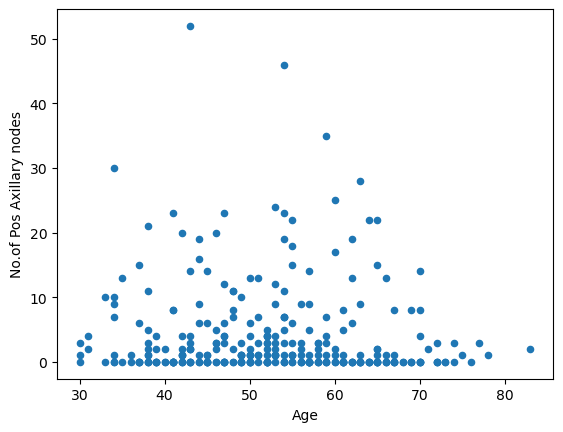

In [6]:
patients.plot(y='No.of Pos Axillary nodes', x='Age',kind='scatter');
plt.show()

Observation:<br>

For Most of the Patients The No.of axillary nodes is '0'

In [8]:
patients.get("No.of Pos Axillary nodes").value_counts()

0     136
1      41
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: No.of Pos Axillary nodes, dtype: int64

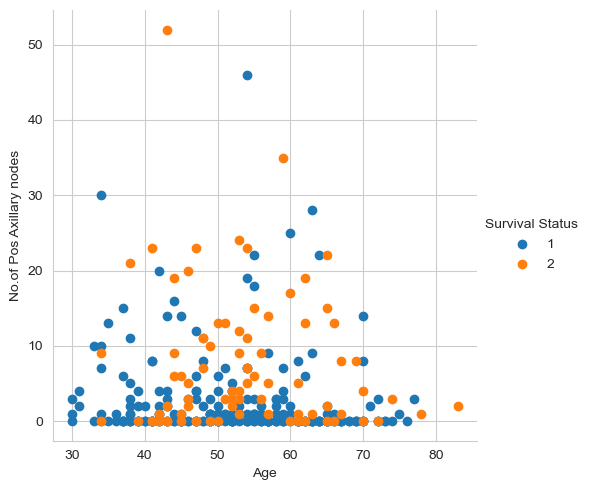

In [9]:
sns.set_style("whitegrid")

sns.FacetGrid(patients,hue='Survival Status',height=5) \
    .map(plt.scatter,'Age','No.of Pos Axillary nodes') \
    .add_legend()
plt.show()

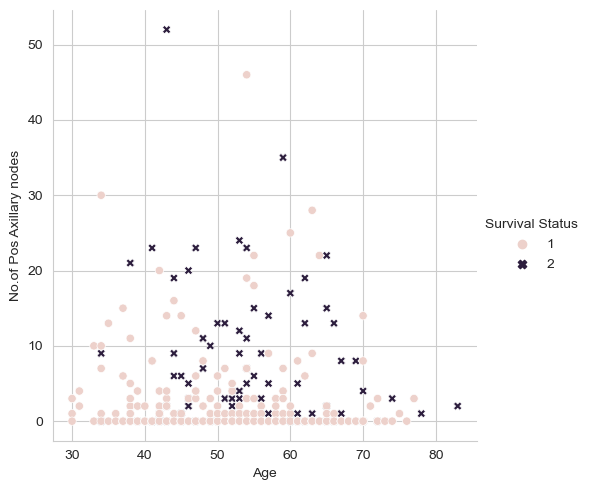

In [17]:
sns.set_style('whitegrid')
sns.relplot(patients, x = 'Age', y = 'No.of Pos Axillary nodes', hue = 'Survival Status', style = "Survival Status",  height = 5)
plt.show()

Observation:<br>
We cant classify through this features with this type of plot.

### PairPlot

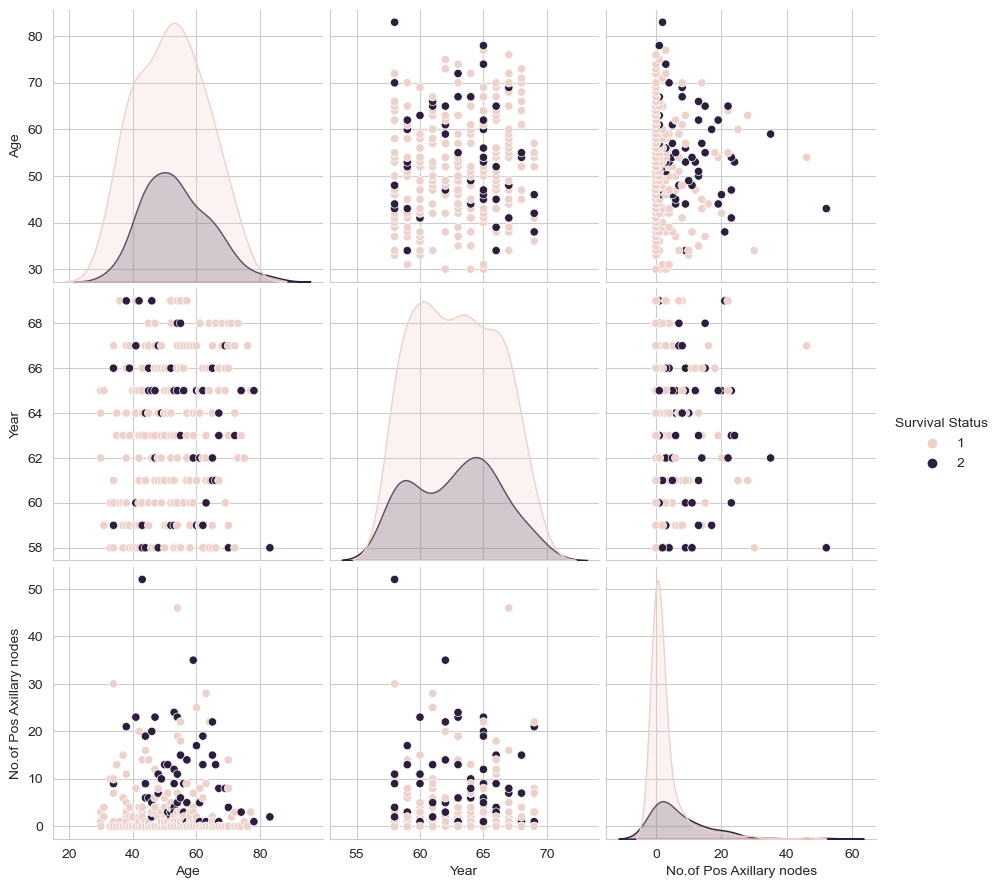

In [18]:
sns.set_style("whitegrid");

sns.pairplot(patients,hue='Survival Status',height=3,vars=["Age", "Year", "No.of Pos Axillary nodes"])
plt.show()


Note: Without Considering Survival statues column there are 3 cols-> 3C2 plots ->3 plots<br>

With this 3 plots its difficult to classify the survival status.

## Univariant Analysis

### PDF

E:\Anaconda_Navigator\envs\ITILAI\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_Navigator\envs\ITILAI\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


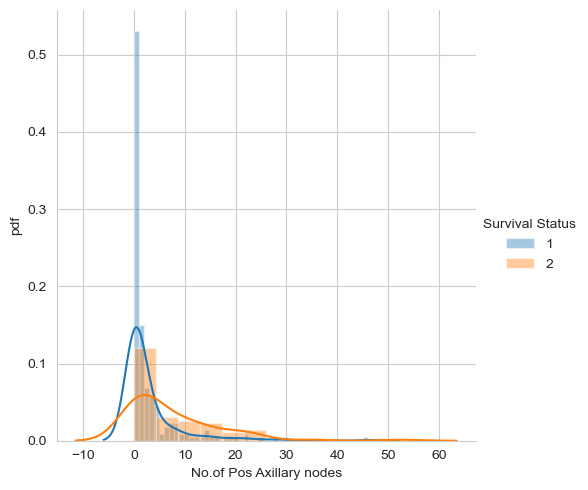

In [19]:
sns.FacetGrid(patients, hue="Survival Status", height=5) \
   .map(sns.distplot, "No.of Pos Axillary nodes") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

Observation:<br>
Spread is more for status 1 than status 2<br>

More no.of patients of status 1 has less no.of Axillary Nodes That may indicate a inverse relation between Axillary nodes and Survival Status

E:\Anaconda_Navigator\envs\ITILAI\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_Navigator\envs\ITILAI\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


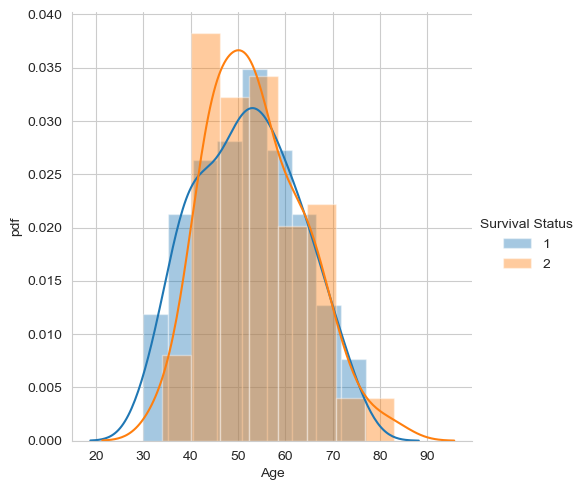

In [34]:
sns.FacetGrid(patients, hue="Survival Status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

E:\Anaconda_Navigator\envs\ITILAI\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda_Navigator\envs\ITILAI\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


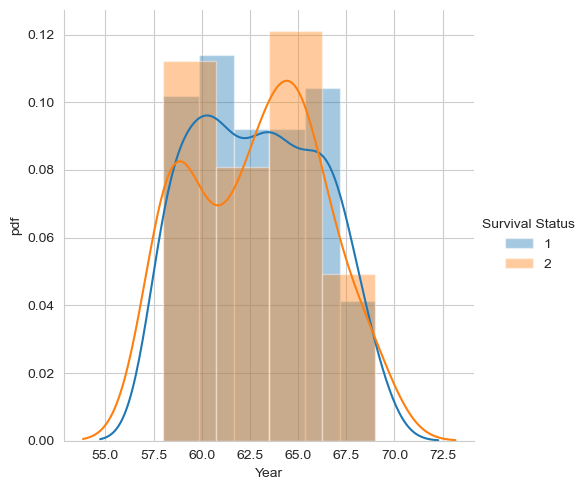

In [35]:
sns.FacetGrid(patients, hue="Survival Status", height=5) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

In [22]:
status_1= patients[patients['Survival Status']==1]
status_1.head()

,Age,Year,No.of Pos Axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [23]:
status_2= patients[patients['Survival Status']==2]
status_2.head()

,Age,Year,No.of Pos Axillary nodes,Survival Status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


In [24]:
status_1.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [25]:
status_2.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observation:<br>
Status 1: Mean of no.of axillary nodes -> 2.8~         std -> 5.9~ <br>
Status 2: Mean of no.of axillary nodes -> 7.5~         std -> 9.1~ <br>

That Implies More no.of Axillary nodes patients may tend to die with in 5 years of operation

### PDF CDF

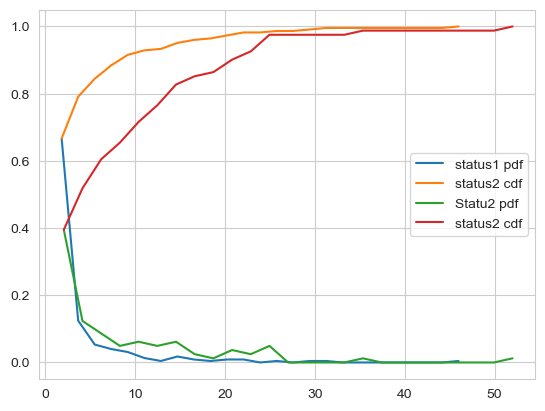

In [42]:
counts, bin_edges = np.histogram(status_1['No.of Pos Axillary nodes'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['No.of Pos Axillary nodes'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()


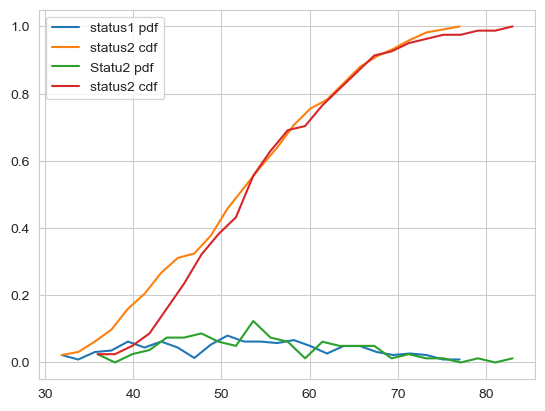

In [43]:
counts, bin_edges = np.histogram(status_1['Age'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['Age'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()

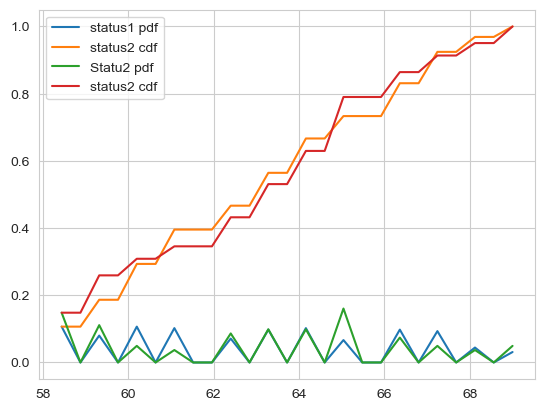

In [44]:
counts, bin_edges = np.histogram(status_1['Year'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='status1 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')


counts, bin_edges = np.histogram(status_2['Year'], bins=25, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Statu2 pdf');
plt.plot(bin_edges[1:], cdf,label='status2 cdf')
plt.legend()
plt.show()

### Box Plot

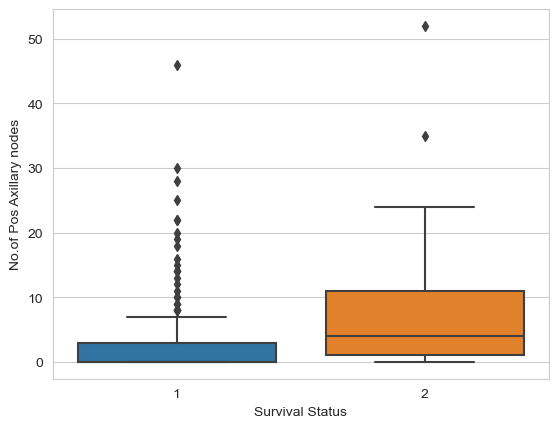

In [45]:
sns.boxplot(x='Survival Status',y='No.of Pos Axillary nodes', data=patients)
plt.show()

Observation:<br>

Status1 -> About 50 percentile people has Axillary nodes 0 and 75 percentile have about 3~ axillary nodes.<br>
status2 -> About 50 percentile people has Axillary nodes more than 4~ and 25percentile patients have 1-3 nodes.

### Violin Plot

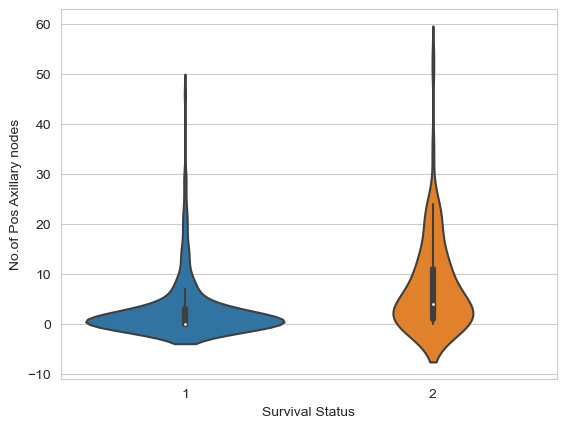

In [46]:
sns.violinplot(x='Survival Status',y='No.of Pos Axillary nodes', data=patients,size=8)
plt.show()

## MultiVariant Analysis

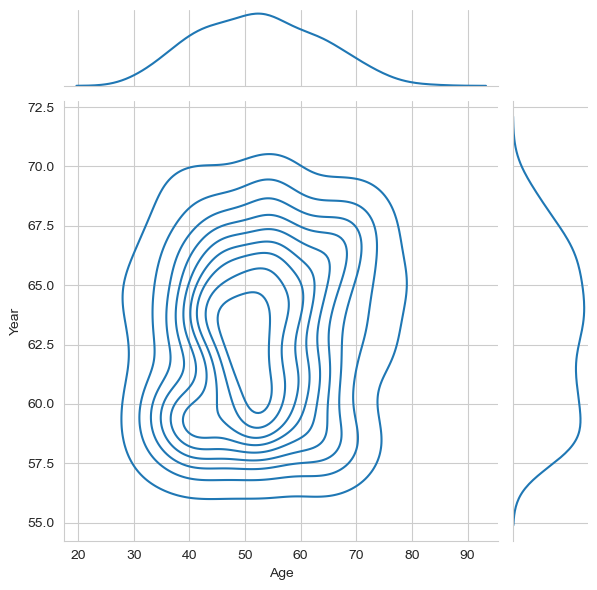

In [47]:
sns.jointplot(x= 'Age',kind = 'kde', y='Year', data = patients)
plt.show()

There are more number of patients undergone operation during the year 1960 - 1964 period and between ages 45 - 55

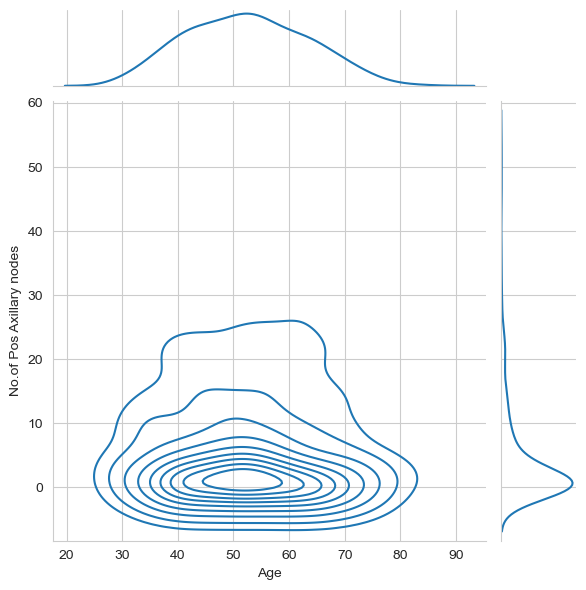

In [48]:
sns.jointplot(x= 'Age',kind = 'kde', y='No.of Pos Axillary nodes', data = patients)
plt.show()

Conclusion:<br>
From PDF,Box plot and Means of no.of axillary nodes, It is evident that if there are more no.of axillary nodes the patient may tend to die with in 5 years of operation.